# DAOs ("governance")

In [1]:
import requests

headers = {
    # 'authority': 'graphql.messari.io',
    # 'accept': '*/*',
    # 'accept-language': 'es-ES,es;q=0.9',
    # 'cache-control': 'no-cache',
    # 'content-type': 'application/json',
    # 'origin': 'https://messari.io',
    # 'pragma': 'no-cache',
    # 'referer': 'https://messari.io/',
    # 'sec-fetch-dest': 'empty',
    # 'sec-fetch-mode': 'cors',
    # 'sec-fetch-site': 'same-site',
    # 'sec-gpc': '1',
    # 'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36',
}

params = {
    'operationName': 'Daos',
    'extensions': '{"persistedQuery":{"version":1,"sha256Hash":"c3d43ab31b5b07de01ba96d41a2966795f06a538e160597b7d5546e371cd6918"}}',
}

response = requests.get('https://graphql.messari.io/query', params=params, headers=headers)

In [2]:
response.text

'{"data":{"governances":{"totalCount":884,"pageInfo":{"hasPreviousPage":false,"hasNextPage":false,"startCursor":"00233765-eb17-4e75-954f-82258bb990aa","endCursor":"ff8b3dc9-7b53-41d4-9aa9-93797c0d8587","__typename":"PaginationInfo"},"edges":[{"node":{"__typename":"Governance","id":"00233765-eb17-4e75-954f-82258bb990aa","govAlertCapable":false,"name":"Shell Protocol","tags":["DeFi"],"slug":"shell-protocol","type":["Protocol"],"logoUrl":"https://directus.messari.io/assets/35271d8f-6845-4325-a21d-f17d210310ad","details":"Shell Protocol is an accounting architecture and AMM .","propositionStatusMetrics":{"id":"00233765-eb17-4e75-954f-82258bb990aa","totalCount":0,"activeVoteCount":0,"__typename":"PropositionStatusMetrics"},"governingBodies":[{"id":"a817be80-ab38-452c-90cd-ad0c87394935","name":"Shell Protocol DAO","logoUrl":"https://directus.messari.io/assets/35271d8f-6845-4325-a21d-f17d210310ad","__typename":"GoverningBody"}]},"__typename":"GovernanceEdge"},{"node":{"__typename":"Governance

In [3]:
# load into pandas
import pandas as pd
import json

data = json.loads(response.text)
data['data']['governances']

{'totalCount': 884,
 'pageInfo': {'hasPreviousPage': False,
  'hasNextPage': False,
  'startCursor': '00233765-eb17-4e75-954f-82258bb990aa',
  'endCursor': 'ff8b3dc9-7b53-41d4-9aa9-93797c0d8587',
  '__typename': 'PaginationInfo'},
 'edges': [{'node': {'__typename': 'Governance',
    'id': '00233765-eb17-4e75-954f-82258bb990aa',
    'govAlertCapable': False,
    'name': 'Shell Protocol',
    'tags': ['DeFi'],
    'slug': 'shell-protocol',
    'type': ['Protocol'],
    'logoUrl': 'https://directus.messari.io/assets/35271d8f-6845-4325-a21d-f17d210310ad',
    'details': 'Shell Protocol is an accounting architecture and AMM .',
    'propositionStatusMetrics': {'id': '00233765-eb17-4e75-954f-82258bb990aa',
     'totalCount': 0,
     'activeVoteCount': 0,
     '__typename': 'PropositionStatusMetrics'},
    'governingBodies': [{'id': 'a817be80-ab38-452c-90cd-ad0c87394935',
      'name': 'Shell Protocol DAO',
      'logoUrl': 'https://directus.messari.io/assets/35271d8f-6845-4325-a21d-f17d21031

In [4]:
df = pd.DataFrame(data['data']['governances']['edges'])
# flatten the node column
df = pd.concat([df.drop(['node'], axis=1), df['node'].apply(pd.Series)], axis=1)
df.head()

,__typename,__typename,id,govAlertCapable,name,tags,slug,type,logoUrl,details,propositionStatusMetrics,governingBodies
0,GovernanceEdge,Governance,00233765-eb17-4e75-954f-82258bb990aa,False,Shell Protocol,[DeFi],shell-protocol,[Protocol],https://directus.messari.io/assets/35271d8f-68...,Shell Protocol is an accounting architecture a...,"{'id': '00233765-eb17-4e75-954f-82258bb990aa',...",[{'id': 'a817be80-ab38-452c-90cd-ad0c87394935'...
1,GovernanceEdge,Governance,0032e64d-5105-4369-89c4-46f05247c684,False,Free Company,[],free-company,[Investment],https://directus.messari.io/assets/c374f38d-30...,Free Company is a syndicate of experienced cry...,"{'id': '0032e64d-5105-4369-89c4-46f05247c684',...",[{'id': '90706ce8-7d6c-40b8-ac71-5407f955156a'...
2,GovernanceEdge,Governance,00453db4-685a-4221-9ad1-fda0d82c3a8a,True,Cream Finance,[DeFi],cream-finance-governance,[Protocol],https://directus.messari.io/assets/08dd5f56-a6...,Cream Finance is a decentralized lending proto...,"{'id': '00453db4-685a-4221-9ad1-fda0d82c3a8a',...",[{'id': '04041d7c-5277-4037-9582-c1e1f962bc2f'...
3,GovernanceEdge,Governance,004556b2-f0c0-4843-887c-4b539140ee43,False,Bleeps DAO,"[NFTs, Music]",bleeps-dao,[Protocol],https://directus.messari.io/assets/05d6a345-73...,Bleeps DAO is building a protocol to compose s...,"{'id': '004556b2-f0c0-4843-887c-4b539140ee43',...",[{'id': '69ce9499-a54d-4530-bba5-79107b841abe'...
4,GovernanceEdge,Governance,0050d8cf-2650-4d66-94dc-77d871b0d755,False,Psychedelic,[Developers],psychedelic,[Service],https://directus.messari.io/assets/90469c18-a6...,Psychedelic is a decentralized product studio ...,"{'id': '0050d8cf-2650-4d66-94dc-77d871b0d755',...",[{'id': 'ea21b168-e508-4427-8aa4-3b488ffca90f'...


In [5]:
# drop __typename column
df = df.drop(['__typename'], axis=1)

In [6]:
# drop logoUrl column
df = df.drop(['logoUrl'], axis=1)

In [7]:
df.head()

,id,govAlertCapable,name,tags,slug,type,details,propositionStatusMetrics,governingBodies
0,00233765-eb17-4e75-954f-82258bb990aa,False,Shell Protocol,[DeFi],shell-protocol,[Protocol],Shell Protocol is an accounting architecture a...,"{'id': '00233765-eb17-4e75-954f-82258bb990aa',...",[{'id': 'a817be80-ab38-452c-90cd-ad0c87394935'...
1,0032e64d-5105-4369-89c4-46f05247c684,False,Free Company,[],free-company,[Investment],Free Company is a syndicate of experienced cry...,"{'id': '0032e64d-5105-4369-89c4-46f05247c684',...",[{'id': '90706ce8-7d6c-40b8-ac71-5407f955156a'...
2,00453db4-685a-4221-9ad1-fda0d82c3a8a,True,Cream Finance,[DeFi],cream-finance-governance,[Protocol],Cream Finance is a decentralized lending proto...,"{'id': '00453db4-685a-4221-9ad1-fda0d82c3a8a',...",[{'id': '04041d7c-5277-4037-9582-c1e1f962bc2f'...
3,004556b2-f0c0-4843-887c-4b539140ee43,False,Bleeps DAO,"[NFTs, Music]",bleeps-dao,[Protocol],Bleeps DAO is building a protocol to compose s...,"{'id': '004556b2-f0c0-4843-887c-4b539140ee43',...",[{'id': '69ce9499-a54d-4530-bba5-79107b841abe'...
4,0050d8cf-2650-4d66-94dc-77d871b0d755,False,Psychedelic,[Developers],psychedelic,[Service],Psychedelic is a decentralized product studio ...,"{'id': '0050d8cf-2650-4d66-94dc-77d871b0d755',...",[{'id': 'ea21b168-e508-4427-8aa4-3b488ffca90f'...


In [8]:
# add column for totalPropositionsCount
df['totalPropositionsCount'] = df['propositionStatusMetrics'].apply(lambda x: x['totalCount'])
# drop propositionStatusMetrics column
df = df.drop(['propositionStatusMetrics'], axis=1)
df.head()

,id,govAlertCapable,name,tags,slug,type,details,governingBodies,totalPropositionsCount
0,00233765-eb17-4e75-954f-82258bb990aa,False,Shell Protocol,[DeFi],shell-protocol,[Protocol],Shell Protocol is an accounting architecture a...,[{'id': 'a817be80-ab38-452c-90cd-ad0c87394935'...,0
1,0032e64d-5105-4369-89c4-46f05247c684,False,Free Company,[],free-company,[Investment],Free Company is a syndicate of experienced cry...,[{'id': '90706ce8-7d6c-40b8-ac71-5407f955156a'...,0
2,00453db4-685a-4221-9ad1-fda0d82c3a8a,True,Cream Finance,[DeFi],cream-finance-governance,[Protocol],Cream Finance is a decentralized lending proto...,[{'id': '04041d7c-5277-4037-9582-c1e1f962bc2f'...,46
3,004556b2-f0c0-4843-887c-4b539140ee43,False,Bleeps DAO,"[NFTs, Music]",bleeps-dao,[Protocol],Bleeps DAO is building a protocol to compose s...,[{'id': '69ce9499-a54d-4530-bba5-79107b841abe'...,0
4,0050d8cf-2650-4d66-94dc-77d871b0d755,False,Psychedelic,[Developers],psychedelic,[Service],Psychedelic is a decentralized product studio ...,[{'id': 'ea21b168-e508-4427-8aa4-3b488ffca90f'...,0


In [9]:
df = df.drop(['governingBodies'], axis=1)

In [10]:
df.head()

,id,govAlertCapable,name,tags,slug,type,details,totalPropositionsCount
0,00233765-eb17-4e75-954f-82258bb990aa,False,Shell Protocol,[DeFi],shell-protocol,[Protocol],Shell Protocol is an accounting architecture a...,0
1,0032e64d-5105-4369-89c4-46f05247c684,False,Free Company,[],free-company,[Investment],Free Company is a syndicate of experienced cry...,0
2,00453db4-685a-4221-9ad1-fda0d82c3a8a,True,Cream Finance,[DeFi],cream-finance-governance,[Protocol],Cream Finance is a decentralized lending proto...,46
3,004556b2-f0c0-4843-887c-4b539140ee43,False,Bleeps DAO,"[NFTs, Music]",bleeps-dao,[Protocol],Bleeps DAO is building a protocol to compose s...,0
4,0050d8cf-2650-4d66-94dc-77d871b0d755,False,Psychedelic,[Developers],psychedelic,[Service],Psychedelic is a decentralized product studio ...,0


In [11]:
# save as messari_daos.csv
df.to_csv('messari_daos.csv', index=False)

# Propositions

In [12]:
import requests

headers = {
    'authority': 'graphql.messari.io',
    'accept': '*/*',
    'accept-language': 'es-ES,es;q=0.9',
    'cache-control': 'no-cache',
    'content-type': 'application/json',
    'origin': 'https://messari.io',
    'pragma': 'no-cache',
    'referer': 'https://messari.io/',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'sec-gpc': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36',
}

params = {
    'operationName': 'Propositions',
    'variables': '{"first":30000}',
    'extensions': '{"persistedQuery":{"version":1,"sha256Hash":"e148b683f626123efa28a886fb27726d24951e643d089f5d757724f0641a5f2c"}}',
}

response = requests.get('https://graphql.messari.io/query', params=params, headers=headers)

In [13]:
data = json.loads(response.text)
propositions_df = pd.DataFrame(data['data']['propositions']['edges'])
propositions_df = pd.concat([propositions_df.drop(['node'], axis=1), propositions_df['node'].apply(pd.Series)], axis=1)
propositions_df.shape

(8614, 15)

In [14]:
# flatten governingBody column and prefix with governingBody
propositions_df = pd.concat([propositions_df.drop(['governingBody'], axis=1), propositions_df['governingBody'].apply(pd.Series).add_prefix('governingBody_')], axis=1)
propositions_df = pd.concat([propositions_df.drop(['governance'], axis=1), propositions_df['governance'].apply(pd.Series).add_prefix('governance_')], axis=1)

In [15]:
propositions_df.head()

,cursor,__typename,id,details,title,status,category,subCategory,importance,inceptionDate,phases,resources,__typename,governingBody_id,governingBody_name,governingBody_logoUrl,governingBody___typename,governance_slug,governance___typename
0,00021601-24a1-49d0-b442-ed6d9266f3d5,PropositionEdge,00021601-24a1-49d0-b442-ed6d9266f3d5,This proposal aims to remove the sanFEIEUR and...,Remove sanFEIEUR and Uni-V2agEURFEI from SDT G...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1659373200,"[{'__typename': 'PreliminaryDiscussion', 'id':...",[],Proposition,1eed5db5-10d9-4d1a-b067-d10097178da0,Stake DAO,https://directus.messari.io/assets/7c7eebdf-8c...,GoverningBody,stake-dao-governance,Governance
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,PropositionEdge,000cf2c4-3aae-4d58-952e-8c9396d5037c,This proposal aims to further mitigate the Ban...,Approve Only Bancor DAO to Initiate and Take V...,FAILED,Parameter Change,Other Network Change,HIGH,1657789200,"[{'__typename': 'PreliminaryDiscussion', 'id':...","[{'source': 'Discourse', 'title': 'Forum Discu...",Proposition,e5b3ea02-19ab-4499-b947-f8faaf30f344,Bancor DAO,https://directus.messari.io/assets/4d8c824d-bf...,GoverningBody,bancor-governance,Governance
2,00253659-bccc-4c80-86f8-39cf63fe8153,PropositionEdge,00253659-bccc-4c80-86f8-39cf63fe8153,This proposal aims to whitelist eight 3CRV Con...,Whitelist Strategies for Gro Protocol (015) - ...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1652720400,"[{'__typename': 'PreliminaryDiscussion', 'id':...",[],Proposition,5e51966a-cf27-4a6f-91d3-37cc57916b6b,Gro Protocol DAO,https://directus.messari.io/assets/d504459c-f3...,GoverningBody,gro-protocol-governance,Governance
3,0037f9d9-aac3-48ce-8e66-aa0d35570053,PropositionEdge,0037f9d9-aac3-48ce-8e66-aa0d35570053,This proposal introduces minimal modifications...,[Revote] Only Allow Token Transfers via Their ...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1654626907,"[{'__typename': 'SnapshotProposal', 'id': 'Qmc...","[{'source': 'Repository', 'title': 'Governance...",Proposition,000a8691-658c-414c-ae60-f28ef6949701,Spartan Council,https://directus.messari.io/assets/7a0effd3-c2...,GoverningBody,synthetix-governance,Governance
4,004cadbb-aad1-4628-bda2-7008dd3984f3,PropositionEdge,004cadbb-aad1-4628-bda2-7008dd3984f3,This proposal aims to enable a gauge of the T/...,Enable T/WETH 80/20 Gauge on Ethereum (BIP 110),SUCCEEDED,Parameter Change,Other Network Change,LOW,1667728800,"[{'__typename': 'PreliminaryDiscussion', 'id':...","[{'source': 'Discourse', 'title': 'Forum Discu...",Proposition,5d07e6ef-bb9a-4f01-83a1-5e3b9b8f9b61,Balancer DAO,https://directus.messari.io/assets/a88725cf-24...,GoverningBody,balancer-governance,Governance


In [16]:
# cursor is a dupe of id, remove it
# drop __typename col
propositions_df = propositions_df.drop(['cursor', '__typename', 'governingBody___typename', 'governance___typename'], axis=1)

In [17]:
propositions_df.head()

,id,details,title,status,category,subCategory,importance,inceptionDate,phases,resources,governingBody_id,governingBody_name,governingBody_logoUrl,governance_slug
0,00021601-24a1-49d0-b442-ed6d9266f3d5,This proposal aims to remove the sanFEIEUR and...,Remove sanFEIEUR and Uni-V2agEURFEI from SDT G...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1659373200,"[{'__typename': 'PreliminaryDiscussion', 'id':...",[],1eed5db5-10d9-4d1a-b067-d10097178da0,Stake DAO,https://directus.messari.io/assets/7c7eebdf-8c...,stake-dao-governance
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,This proposal aims to further mitigate the Ban...,Approve Only Bancor DAO to Initiate and Take V...,FAILED,Parameter Change,Other Network Change,HIGH,1657789200,"[{'__typename': 'PreliminaryDiscussion', 'id':...","[{'source': 'Discourse', 'title': 'Forum Discu...",e5b3ea02-19ab-4499-b947-f8faaf30f344,Bancor DAO,https://directus.messari.io/assets/4d8c824d-bf...,bancor-governance
2,00253659-bccc-4c80-86f8-39cf63fe8153,This proposal aims to whitelist eight 3CRV Con...,Whitelist Strategies for Gro Protocol (015) - ...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1652720400,"[{'__typename': 'PreliminaryDiscussion', 'id':...",[],5e51966a-cf27-4a6f-91d3-37cc57916b6b,Gro Protocol DAO,https://directus.messari.io/assets/d504459c-f3...,gro-protocol-governance
3,0037f9d9-aac3-48ce-8e66-aa0d35570053,This proposal introduces minimal modifications...,[Revote] Only Allow Token Transfers via Their ...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1654626907,"[{'__typename': 'SnapshotProposal', 'id': 'Qmc...","[{'source': 'Repository', 'title': 'Governance...",000a8691-658c-414c-ae60-f28ef6949701,Spartan Council,https://directus.messari.io/assets/7a0effd3-c2...,synthetix-governance
4,004cadbb-aad1-4628-bda2-7008dd3984f3,This proposal aims to enable a gauge of the T/...,Enable T/WETH 80/20 Gauge on Ethereum (BIP 110),SUCCEEDED,Parameter Change,Other Network Change,LOW,1667728800,"[{'__typename': 'PreliminaryDiscussion', 'id':...","[{'source': 'Discourse', 'title': 'Forum Discu...",5d07e6ef-bb9a-4f01-83a1-5e3b9b8f9b61,Balancer DAO,https://directus.messari.io/assets/a88725cf-24...,balancer-governance


In [18]:
# drop governingBody_logoUrl and governingBody_name and governance_slug
propositions_df = propositions_df.drop(['governingBody_logoUrl', 'governingBody_name', 'governance_slug'], axis=1)

In [19]:
# make dates
# propositions_df['inceptionDate'] = pd.to_datetime(propositions_df['inceptionDate'])
# propositions_df.head()

In [20]:
propositions_df.iloc[0]

id                               00021601-24a1-49d0-b442-ed6d9266f3d5
details             This proposal aims to remove the sanFEIEUR and...
title               Remove sanFEIEUR and Uni-V2agEURFEI from SDT G...
status                                                      SUCCEEDED
category                                             Parameter Change
subCategory                                      Other Network Change
importance                                                        LOW
inceptionDate                                              1659373200
phases              [{'__typename': 'PreliminaryDiscussion', 'id':...
resources                                                          []
governingBody_id                 1eed5db5-10d9-4d1a-b067-d10097178da0
Name: 0, dtype: object

In [21]:
propositions_df.iloc[0]['phases']

[{'__typename': 'PreliminaryDiscussion',
  'id': '9c579839-83b4-45f2-b7ce-dfa4cef77e69',
  'author': 'Nmeyla',
  'state': 'ACTIVE',
  'publishDate': 1659373200,
  'source': 'Stake DAO Forum',
  'sentiment': 'NEUTRAL',
  'url': 'https://gov.stakedao.org/t/sdir-12-remove-sanfeieur-and-uni-v2ageurfei-strategies-from-sdt-gauge/709'},
 {'__typename': 'SnapshotProposal',
  'id': '0x4ae7ccecb4eac3ece9082686cee88970a2d7771adecc7aa3e408df558bf1b25d',
  'label': None,
  'closedStatus': 'Succeeded',
  'created': 1659600788,
  'startTimestamp': 1659600746,
  'endTimestamp': 1659859200,
  'states': [{'start': 1659600788,
    'end': 1659600746,
    'status': 'PENDING',
    '__typename': 'SnapshotState'},
   {'start': 1659600746,
    'end': 1659859200,
    'status': 'ACTIVE',
    '__typename': 'SnapshotState'},
   {'start': 1659859200,
    'end': None,
    'status': 'CLOSED',
    '__typename': 'SnapshotState'}],
  'choices': ['Yes, remove ', "No, don't remove ", 'Abstain'],
  'voteTally': {'id': '0x4

In [22]:
propositions_df.iloc[1]['resources']

[{'source': 'Discourse',
  'title': 'Forum Discussion',
  'url': 'https://gov.bancor.network/t/proposal-only-dao-can-initiate-and-take-vortex-rewards/3828',
  '__typename': 'Resource'},
 {'source': 'Snapshot',
  'title': 'Off-Chain Vote',
  'url': 'https://snapshot.org/#/bancornetwork.eth/proposal/0xc574c06a982d41c82d287bb8ff8595ba48ed456c1d66740bc0289d5082fda981',
  '__typename': 'Resource'}]

In [23]:
propositions_df_without_phases = propositions_df.drop(['phases'], axis=1)
propositions_df_without_phases.head()

,id,details,title,status,category,subCategory,importance,inceptionDate,resources,governingBody_id
0,00021601-24a1-49d0-b442-ed6d9266f3d5,This proposal aims to remove the sanFEIEUR and...,Remove sanFEIEUR and Uni-V2agEURFEI from SDT G...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1659373200,[],1eed5db5-10d9-4d1a-b067-d10097178da0
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,This proposal aims to further mitigate the Ban...,Approve Only Bancor DAO to Initiate and Take V...,FAILED,Parameter Change,Other Network Change,HIGH,1657789200,"[{'source': 'Discourse', 'title': 'Forum Discu...",e5b3ea02-19ab-4499-b947-f8faaf30f344
2,00253659-bccc-4c80-86f8-39cf63fe8153,This proposal aims to whitelist eight 3CRV Con...,Whitelist Strategies for Gro Protocol (015) - ...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1652720400,[],5e51966a-cf27-4a6f-91d3-37cc57916b6b
3,0037f9d9-aac3-48ce-8e66-aa0d35570053,This proposal introduces minimal modifications...,[Revote] Only Allow Token Transfers via Their ...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1654626907,"[{'source': 'Repository', 'title': 'Governance...",000a8691-658c-414c-ae60-f28ef6949701
4,004cadbb-aad1-4628-bda2-7008dd3984f3,This proposal aims to enable a gauge of the T/...,Enable T/WETH 80/20 Gauge on Ethereum (BIP 110),SUCCEEDED,Parameter Change,Other Network Change,LOW,1667728800,"[{'source': 'Discourse', 'title': 'Forum Discu...",5d07e6ef-bb9a-4f01-83a1-5e3b9b8f9b61


In [24]:
# move governingBody_id to be the second column
propositions_df_without_phases = propositions_df_without_phases[['id', 'governingBody_id', 'title', 'details', 'status', 'category', 'subCategory', 'importance', 'inceptionDate', 'resources']]
propositions_df_without_phases.head()

,id,governingBody_id,title,details,status,category,subCategory,importance,inceptionDate,resources
0,00021601-24a1-49d0-b442-ed6d9266f3d5,1eed5db5-10d9-4d1a-b067-d10097178da0,Remove sanFEIEUR and Uni-V2agEURFEI from SDT G...,This proposal aims to remove the sanFEIEUR and...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1659373200,[]
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,e5b3ea02-19ab-4499-b947-f8faaf30f344,Approve Only Bancor DAO to Initiate and Take V...,This proposal aims to further mitigate the Ban...,FAILED,Parameter Change,Other Network Change,HIGH,1657789200,"[{'source': 'Discourse', 'title': 'Forum Discu..."
2,00253659-bccc-4c80-86f8-39cf63fe8153,5e51966a-cf27-4a6f-91d3-37cc57916b6b,Whitelist Strategies for Gro Protocol (015) - ...,This proposal aims to whitelist eight 3CRV Con...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1652720400,[]
3,0037f9d9-aac3-48ce-8e66-aa0d35570053,000a8691-658c-414c-ae60-f28ef6949701,[Revote] Only Allow Token Transfers via Their ...,This proposal introduces minimal modifications...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1654626907,"[{'source': 'Repository', 'title': 'Governance..."
4,004cadbb-aad1-4628-bda2-7008dd3984f3,5d07e6ef-bb9a-4f01-83a1-5e3b9b8f9b61,Enable T/WETH 80/20 Gauge on Ethereum (BIP 110),This proposal aims to enable a gauge of the T/...,SUCCEEDED,Parameter Change,Other Network Change,LOW,1667728800,"[{'source': 'Discourse', 'title': 'Forum Discu..."


## Analyzing platforms ("resources")

In [43]:
# keep only id and reosurces
propositions_df_resources = propositions_df[['id', 'resources']]
# remove resources column where its an empty list
propositions_df_resources = propositions_df_resources[propositions_df_resources['resources'].map(lambda d: len(d)) > 0]
# rename id to proposition_id
propositions_df_resources = propositions_df_resources.rename(columns={'id': 'proposition_id'})
# explode resources column
resources_df = propositions_df_resources.explode('resources')
resources_df

,proposition_id,resources
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,"{'source': 'Discourse', 'title': 'Forum Discus..."
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,"{'source': 'Snapshot', 'title': 'Off-Chain Vot..."
3,0037f9d9-aac3-48ce-8e66-aa0d35570053,"{'source': 'Repository', 'title': 'Governance ..."
4,004cadbb-aad1-4628-bda2-7008dd3984f3,"{'source': 'Discourse', 'title': 'Forum Discus..."
5,0067659a-b485-428a-8420-ce9c13ea6c96,"{'source': 'Snapshot', 'title': 'Off-Chain Vot..."
...,...,...
8607,ffd7ef40-4eec-4b15-945c-cd67936b6701,"{'source': 'Snapshot', 'title': 'Off Chain Vot..."
8609,ffdcd8ca-271c-495f-94ff-fc601701af95,"{'source': 'Discourse', 'title': 'Follow Up Fo..."
8610,ffee87d4-96e2-4783-a14e-83764636fa74,"{'source': 'Discourse', 'title': 'Forum Discus..."
8611,fff517ba-7b7c-48d6-a7cf-33f1dfb14698,"{'source': 'Discourse', 'title': 'Forum Discus..."


In [45]:
# flatten resources column
resources_df = pd.concat([resources_df.drop(['resources'], axis=1), resources_df['resources'].apply(pd.Series)], axis=1)
resources_df

,proposition_id,source,title,url,__typename
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,Discourse,Forum Discussion,https://gov.bancor.network/t/proposal-only-dao...,Resource
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,Snapshot,Off-Chain Vote,https://snapshot.org/#/bancornetwork.eth/propo...,Resource
3,0037f9d9-aac3-48ce-8e66-aa0d35570053,Repository,Governance Proposal,https://sips.synthetix.io/sips/sip-238/,Resource
4,004cadbb-aad1-4628-bda2-7008dd3984f3,Discourse,Forum Discussion,https://forum.balancer.fi/t/enable-t-weth-80-2...,Resource
5,0067659a-b485-428a-8420-ce9c13ea6c96,Snapshot,Off-Chain Vote,https://snapshot.org/#/abipup.eth/proposal/0x7...,Resource
...,...,...,...,...,...
8607,ffd7ef40-4eec-4b15-945c-cd67936b6701,Snapshot,Off Chain Vote,https://snapshot.org/#/frax.eth/proposal/0x575...,Resource
8609,ffdcd8ca-271c-495f-94ff-fc601701af95,Discourse,Follow Up Forum Discussion,https://forum.renproject.io/t/rfc-000-016-laun...,Resource
8610,ffee87d4-96e2-4783-a14e-83764636fa74,Discourse,Forum Discussion,https://forum.threshold.network/t/tip-040-tbtc...,Resource
8611,fff517ba-7b7c-48d6-a7cf-33f1dfb14698,Discourse,Forum Discussion,https://forum.shapeshift.com/t/mini-airdrop-to...,Resource


In [46]:
# drop __typename column
resources_df = resources_df.drop(['__typename'], axis=1)
resources_df.title.value_counts()

Forum Discussion                  4250
Off Chain Vote                     996
Off-Chain Vote                     744
Governance Proposal                736
Follow up Forum Discussion         164
On Chain Vote                      136
Second Forum Discussion             94
Follow Up Forum Discussion          67
Temperature Check                   44
Google Document                     42
Announcement                        41
Google Sheet                        38
Blog Post                           31
Third Forum Discussion              21
Signaling Vote                      19
Third Forum Post                    12
Consensus Check                     11
On-Chain Vote                       10
Follow Up Proposal                   6
Budget Sheet                         6
Off-chain Vote                       5
Project Proposal                     3
Original Vote                        3
Compound Community Dev Call          2
Prequel Forum Discussion             2
Follow Up Community Call 

In [49]:
import tldextract

def get_domain(url, fillna='', filter_www=True):
    """Extract a full domain from a url, drop www"""
    if pd.isnull(url): return fillna
    extracted = tldextract.extract(url)
    subdomain = extracted.subdomain
    if filter_www:
        if subdomain == 'www':
            subdomain = ''
        elif subdomain.startswith('www.'):
            # Handle multi subdomains (www.cruz.senate.gov')
            subdomain = subdomain[len("www."):]
    subdomain = '' if filter_www and subdomain == 'www' else subdomain
    domain = extracted.domain
    suffix = extracted.suffix

    components = [subdomain, domain, suffix]
    domain_str = '.'.join(filter(None, components))
    return domain_str

# make a domain column
resources_df['domain'] = resources_df['url'].apply(get_domain)
resources_df.head()

,proposition_id,source,title,url,domain
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,Discourse,Forum Discussion,https://gov.bancor.network/t/proposal-only-dao...,gov.bancor.network
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,Snapshot,Off-Chain Vote,https://snapshot.org/#/bancornetwork.eth/propo...,snapshot.org
3,0037f9d9-aac3-48ce-8e66-aa0d35570053,Repository,Governance Proposal,https://sips.synthetix.io/sips/sip-238/,sips.synthetix.io
4,004cadbb-aad1-4628-bda2-7008dd3984f3,Discourse,Forum Discussion,https://forum.balancer.fi/t/enable-t-weth-80-2...,forum.balancer.fi
5,0067659a-b485-428a-8420-ce9c13ea6c96,Snapshot,Off-Chain Vote,https://snapshot.org/#/abipup.eth/proposal/0x7...,snapshot.org


In [57]:
# group by domain and title and count
resources_df[~resources_df['title'].str.contains('discussion')].groupby(['domain', 'title']).size().reset_index(name='count').sort_values('count', ascending=False).head(60)

,domain,title,count
353,snapshot.org,Off Chain Vote,954
354,snapshot.org,Off-Chain Vote,733
344,sips.synthetix.io,Governance Proposal,348
88,forum.balancer.fi,Forum Discussion,313
210,gov.bancor.network,Forum Discussion,309
218,gov.frax.finance,Forum Discussion,227
316,notion.so,Governance Proposal,201
151,forum.olympusdao.finance,Forum Discussion,154
174,forum.shapeshift.com,Forum Discussion,149
246,gov.optimism.io,Forum Discussion,143


In [66]:
# repeat but only where the title contains "Vote"
resources_df[resources_df['title'].str.contains('Vote')].groupby(['domain', 'title']).size().reset_index(name='count').sort_values('count', ascending=False).to_csv('messari_vote_resources.csv', index=False)
resources_df[resources_df['title'].str.contains('Vote')].groupby(['domain', 'title']).size().reset_index(name='count').sort_values('count', ascending=False).head(60)
# save to a spreadsheet

,domain,title,count
18,snapshot.org,Off Chain Vote,954
19,snapshot.org,Off-Chain Vote,733
32,withtally.com,On Chain Vote,67
4,compound.finance,On Chain Vote,61
10,gov.synthetix.io,Off Chain Vote,25
22,snapshot.org,Signaling Vote,10
3,app.uniswap.org,On Chain Vote,8
2,app.aave.com,On-Chain Vote,7
28,vote.originprotocol.com,Off Chain Vote,6
20,snapshot.org,Off-chain Vote,5


In [70]:
# find proposals with a snapshot domain
resources_df[resources_df['domain'].str.contains('snapshot.org')].url.iloc[3]

'https://snapshot.org/#/jbdao.eth/proposal/0xe558d166bb91b3ca0bb20f8ae03c6b317bd99b382a288c79e5f1dccee1fcebfc'

## Analyzing phases

In [25]:
# how many phases are none
propositions_df.phases.apply(lambda x: x is None).value_counts()

False    8606
True        8
Name: phases, dtype: int64

In [26]:
# ignore the None phases
propositions_df_with_phases = propositions_df[propositions_df.phases.apply(lambda x: x is not None)]
propositions_df_with_phases.shape

(8606, 11)

In [27]:
# what are the __typenames for the phases?
propositions_df_with_phases.phases.apply(lambda x: x[0]['__typename']).value_counts()

PreliminaryDiscussion    6467
SnapshotProposal         2042
GovernorProposal           81
MakerProposal              13
MakerPoll                   3
Name: phases, dtype: int64

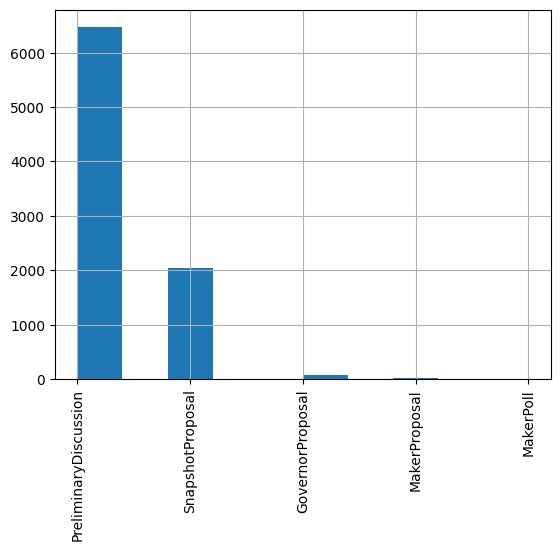

In [28]:
propositions_df_with_phases.phases.apply(lambda x: x[0]['__typename']).hist()
# rotate the x labels
import matplotlib.pyplot as plt
_ = plt.xticks(rotation=90)

<Axes: >

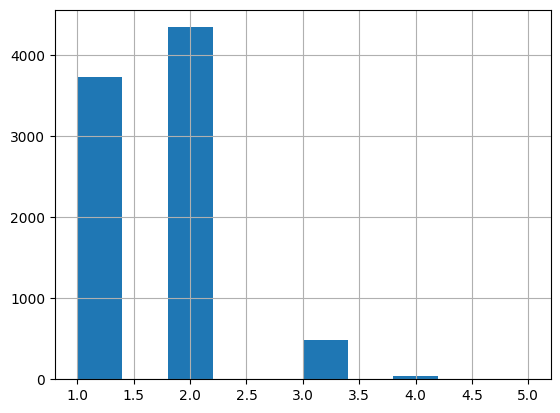

In [29]:
# what are the lengths of the phases elements
propositions_df_with_phases.phases.apply(lambda x: len(x)).hist()

In [30]:
# how many phases are there?
propositions_df_with_phases.phases.apply(lambda x: len(x)).value_counts()
# total is the product of the two above, i.e., 12,000 ish

2    4340
1    3727
3     490
4      43
5       6
Name: phases, dtype: int64

In [31]:
propositions_df_with_phases = propositions_df.copy()
# drop all columns except id, governingBody_id, and phases
cols_to_drop = propositions_df_with_phases.columns.difference(['id', 'governingBody_id', 'phases'])
propositions_df_with_phases.drop(columns=cols_to_drop, inplace=True)
# reordering columns
propositions_df_with_phases = propositions_df_with_phases[['id', 'governingBody_id', 'phases']]
propositions_df_with_phases.head()

,id,governingBody_id,phases
0,00021601-24a1-49d0-b442-ed6d9266f3d5,1eed5db5-10d9-4d1a-b067-d10097178da0,"[{'__typename': 'PreliminaryDiscussion', 'id':..."
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,e5b3ea02-19ab-4499-b947-f8faaf30f344,"[{'__typename': 'PreliminaryDiscussion', 'id':..."
2,00253659-bccc-4c80-86f8-39cf63fe8153,5e51966a-cf27-4a6f-91d3-37cc57916b6b,"[{'__typename': 'PreliminaryDiscussion', 'id':..."
3,0037f9d9-aac3-48ce-8e66-aa0d35570053,000a8691-658c-414c-ae60-f28ef6949701,"[{'__typename': 'SnapshotProposal', 'id': 'Qmc..."
4,004cadbb-aad1-4628-bda2-7008dd3984f3,5d07e6ef-bb9a-4f01-83a1-5e3b9b8f9b61,"[{'__typename': 'PreliminaryDiscussion', 'id':..."


In [32]:
# add a row for each phase
propositions_df_with_phases = propositions_df_with_phases.explode('phases')
propositions_df_with_phases.shape

(14087, 3)

In [33]:
propositions_df_with_phases.head()

,id,governingBody_id,phases
0,00021601-24a1-49d0-b442-ed6d9266f3d5,1eed5db5-10d9-4d1a-b067-d10097178da0,"{'__typename': 'PreliminaryDiscussion', 'id': ..."
0,00021601-24a1-49d0-b442-ed6d9266f3d5,1eed5db5-10d9-4d1a-b067-d10097178da0,"{'__typename': 'SnapshotProposal', 'id': '0x4a..."
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,e5b3ea02-19ab-4499-b947-f8faaf30f344,"{'__typename': 'PreliminaryDiscussion', 'id': ..."
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,e5b3ea02-19ab-4499-b947-f8faaf30f344,"{'__typename': 'SnapshotProposal', 'id': '0xc5..."
2,00253659-bccc-4c80-86f8-39cf63fe8153,5e51966a-cf27-4a6f-91d3-37cc57916b6b,"{'__typename': 'PreliminaryDiscussion', 'id': ..."


In [34]:
# rename id to proposition_id
propositions_df_with_phases = propositions_df_with_phases.rename(columns={'id': 'proposition_id'})
# rename phases to phase
propositions_df_with_phases = propositions_df_with_phases.rename(columns={'phases': 'phase'})
# expand phase into columns
propositions_df_with_phases = pd.concat([propositions_df_with_phases.drop(['phase'], axis=1), propositions_df_with_phases['phase'].apply(pd.Series)], axis=1)
propositions_df_with_phases.head()

/var/folders/yn/b6240_995k3gl4vwtnbzzy480000gq/T/ipykernel_39985/925964683.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  propositions_df_with_phases = pd.concat([propositions_df_with_phases.drop(['phase'], axis=1), propositions_df_with_phases['phase'].apply(pd.Series)], axis=1)
/var/folders/yn/b6240_995k3gl4vwtnbzzy480000gq/T/ipykernel_39985/925964683.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  propositions_df_with_phases = pd.concat([propositions_df_with_phases.drop(['phase'], axis=1), propositions_df_with_phases['phase'].apply(pd.Series)], axis=1)
/var/folders/yn/b6240_995k3gl4vwtnbzzy480000gq/T/ipykernel_39985/925964683.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specif

,proposition_id,governingBody_id,__typename,id,author,state,publishDate,source,sentiment,url,...,voteTally,onChainState,stateHistory,startV2,endV2,currentState,proposalUrl,title,pollUrl,executionDate
0,00021601-24a1-49d0-b442-ed6d9266f3d5,1eed5db5-10d9-4d1a-b067-d10097178da0,PreliminaryDiscussion,9c579839-83b4-45f2-b7ce-dfa4cef77e69,Nmeyla,ACTIVE,1.659373e+09,Stake DAO Forum,NEUTRAL,https://gov.stakedao.org/t/sdir-12-remove-sanf...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,00021601-24a1-49d0-b442-ed6d9266f3d5,1eed5db5-10d9-4d1a-b067-d10097178da0,SnapshotProposal,0x4ae7ccecb4eac3ece9082686cee88970a2d7771adecc...,NaN,NaN,NaN,NaN,NaN,NaN,...,{'id': '0x4ae7ccecb4eac3ece9082686cee88970a2d7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,e5b3ea02-19ab-4499-b947-f8faaf30f344,PreliminaryDiscussion,19a4b28a-174f-4307-a91f-96e047661b02,David Meister,ACTIVE,1.657789e+09,Bancor Forum,POSITIVE,https://gov.bancor.network/t/proposal-only-dao...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,e5b3ea02-19ab-4499-b947-f8faaf30f344,SnapshotProposal,0xc574c06a982d41c82d287bb8ff8595ba48ed456c1d66...,NaN,NaN,NaN,NaN,NaN,NaN,...,{'id': '0xc574c06a982d41c82d287bb8ff8595ba48ed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00253659-bccc-4c80-86f8-39cf63fe8153,5e51966a-cf27-4a6f-91d3-37cc57916b6b,PreliminaryDiscussion,81716bef-9b68-4c7c-a880-4d26f4979ce0,Charlie Martin,ACTIVE,1.652720e+09,Gro Forum,NEUTRAL,https://community.gro.xyz/t/vote-015-gro-proto...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
propositions_df_with_phases['phase_index'] = propositions_df_with_phases.groupby('proposition_id').cumcount()
propositions_df_with_phases.head()

,proposition_id,governingBody_id,__typename,id,author,state,publishDate,source,sentiment,url,...,onChainState,stateHistory,startV2,endV2,currentState,proposalUrl,title,pollUrl,executionDate,phase_index
0,00021601-24a1-49d0-b442-ed6d9266f3d5,1eed5db5-10d9-4d1a-b067-d10097178da0,PreliminaryDiscussion,9c579839-83b4-45f2-b7ce-dfa4cef77e69,Nmeyla,ACTIVE,1.659373e+09,Stake DAO Forum,NEUTRAL,https://gov.stakedao.org/t/sdir-12-remove-sanf...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
0,00021601-24a1-49d0-b442-ed6d9266f3d5,1eed5db5-10d9-4d1a-b067-d10097178da0,SnapshotProposal,0x4ae7ccecb4eac3ece9082686cee88970a2d7771adecc...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,e5b3ea02-19ab-4499-b947-f8faaf30f344,PreliminaryDiscussion,19a4b28a-174f-4307-a91f-96e047661b02,David Meister,ACTIVE,1.657789e+09,Bancor Forum,POSITIVE,https://gov.bancor.network/t/proposal-only-dao...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,e5b3ea02-19ab-4499-b947-f8faaf30f344,SnapshotProposal,0xc574c06a982d41c82d287bb8ff8595ba48ed456c1d66...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,00253659-bccc-4c80-86f8-39cf63fe8153,5e51966a-cf27-4a6f-91d3-37cc57916b6b,PreliminaryDiscussion,81716bef-9b68-4c7c-a880-4d26f4979ce0,Charlie Martin,ACTIVE,1.652720e+09,Gro Forum,NEUTRAL,https://community.gro.xyz/t/vote-015-gro-proto...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [36]:
propositions_df_with_phases.dtypes

proposition_id       object
governingBody_id     object
__typename           object
id                   object
author               object
state                object
publishDate         float64
source               object
sentiment            object
url                  object
label                object
closedStatus         object
created             float64
startTimestamp      float64
endTimestamp        float64
states               object
choices              object
voteTally            object
onChainState         object
stateHistory         object
startV2              object
endV2                object
currentState         object
proposalUrl          object
title                object
pollUrl              object
executionDate       float64
phase_index           int64
dtype: object

In [37]:
# make publishDate, created, startTimestamp, endTimestamp, exectutionDate into dates
# propositions_df_with_phases['publishDate'] = pd.to_datetime(propositions_df_with_phases['publishDate'])
# propositions_df_with_phases['created'] = pd.to_datetime(propositions_df_with_phases['created'])
# propositions_df_with_phases['startTimestamp'] = pd.to_datetime(propositions_df_with_phases['startTimestamp'])
# propositions_df_with_phases['endTimestamp'] = pd.to_datetime(propositions_df_with_phases['endTimestamp'])
# propositions_df_with_phases['executionDate'] = pd.to_datetime(propositions_df_with_phases['executionDate'])

### Snapshot

In [38]:
snapshot_phases = propositions_df_with_phases[propositions_df_with_phases.__typename == 'SnapshotProposal']

In [39]:
# drop __typename
snapshot_phases = snapshot_phases.drop(['__typename'], axis=1)
# drop columns that are all Nans
snapshot_phases = snapshot_phases.dropna(axis=1, how='all')
snapshot_phases.head()

,proposition_id,governingBody_id,id,label,closedStatus,created,startTimestamp,endTimestamp,states,choices,voteTally,phase_index
0,00021601-24a1-49d0-b442-ed6d9266f3d5,1eed5db5-10d9-4d1a-b067-d10097178da0,0x4ae7ccecb4eac3ece9082686cee88970a2d7771adecc...,None,Succeeded,1.659601e+09,1.659601e+09,1.659859e+09,"[{'start': 1659600788, 'end': 1659600746, 'sta...","[Yes, remove , No, don't remove , Abstain]",{'id': '0x4ae7ccecb4eac3ece9082686cee88970a2d7...,1
1,000cf2c4-3aae-4d58-952e-8c9396d5037c,e5b3ea02-19ab-4499-b947-f8faaf30f344,0xc574c06a982d41c82d287bb8ff8595ba48ed456c1d66...,None,Failed,1.658662e+09,1.658662e+09,1.658932e+09,"[{'start': 1658661764, 'end': 1658661760, 'sta...","[For, Against, Abstain]",{'id': '0xc574c06a982d41c82d287bb8ff8595ba48ed...,1
2,00253659-bccc-4c80-86f8-39cf63fe8153,5e51966a-cf27-4a6f-91d3-37cc57916b6b,0x6982a56a724d88f3aff4a68342b9af710d944984a8ad...,None,Succeeded,1.652816e+09,1.652820e+09,1.653079e+09,"[{'start': 1652816360, 'end': 1652819960, 'sta...","[For, Against, Abstain]",{'id': '0x6982a56a724d88f3aff4a68342b9af710d94...,1
2,00253659-bccc-4c80-86f8-39cf63fe8153,5e51966a-cf27-4a6f-91d3-37cc57916b6b,0x58ebfa75327b436b9c2b3a56c1c73e702bd5442af7bd...,None,Failed,1.652817e+09,1.652820e+09,1.653079e+09,"[{'start': 1652816522, 'end': 1652820122, 'sta...","[For, Against, Abstain]",{'id': '0x58ebfa75327b436b9c2b3a56c1c73e702bd5...,2
3,0037f9d9-aac3-48ce-8e66-aa0d35570053,000a8691-658c-414c-ae60-f28ef6949701,Qmcq7TCxc7hiAJLVhxWHA12YfFCcbubnHfsk7kPtmTy63B,None,Succeeded,1.654627e+09,1.654627e+09,1.654886e+09,"[{'start': 1654626907, 'end': 1654626907, 'sta...","[sYES, iNO]",{'id': 'Qmcq7TCxc7hiAJLVhxWHA12YfFCcbubnHfsk7k...,0
